In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
!pip install --upgrade matplotlib seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install missingno
import missingno as msno
from sklearn.metrics import classification_report
from scipy.stats import zscore


sns.set(color_codes = True)
pd.set_option('display.max_columns', 100)

import warnings

# Ignore all warnings 
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [74]:
data=pd.read_csv('Nobese_data.csv')

In [75]:
#Identify columns that start with 'NObeyesdad_'
nobeyesdad_columns = [col for col in data.columns if col.startswith('NObeyesdad_')]

In [76]:
#Combine these one-hot encoded columns back into a single column
# For each row, the new 'NObeyesdad' column will contain the name of the column that has a 1
data['NObeyesdad'] = data[nobeyesdad_columns].idxmax(axis=1)

In [77]:
#Drop the one-hot encoded columns from the dataset
data = data.drop(columns=nobeyesdad_columns)

In [78]:
data.head()

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,age_group,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Other,NObeyesdad
0,0,-0.887408,-0.873051,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,False,True,0,NObeyesdad_Normal_Weight
1,0,-1.960788,-1.178610,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,False,True,0,NObeyesdad_Normal_Weight
2,1,1.044677,-0.376517,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,False,True,0,NObeyesdad_Normal_Weight
3,1,1.044677,0.005432,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,3,False,False,1,NObeyesdad_Overweight_Level_I
4,1,0.830001,0.112377,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,False,True,0,NObeyesdad_Overweight_Level_II


In [79]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [80]:
encoder = LabelEncoder()
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

In [81]:
data['MTRANS_Public_Transportation'] = encoder.fit_transform(data['MTRANS_Public_Transportation'])
data['MTRANS_Automobile'] = encoder.fit_transform(data['MTRANS_Automobile'])


In [82]:
data.head()

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,age_group,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Other,NObeyesdad
0,0,-0.887408,-0.873051,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,0,1,0,1
1,0,-1.960788,-1.178610,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,0,1,0,1
2,1,1.044677,-0.376517,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,0,1,0,1
3,1,1.044677,0.005432,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,3,0,0,1,5
4,1,0.830001,0.112377,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,0,1,0,6


In [83]:
#'NObeyesdad' is the target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad'] #target

In [84]:
 # Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Instantiate and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

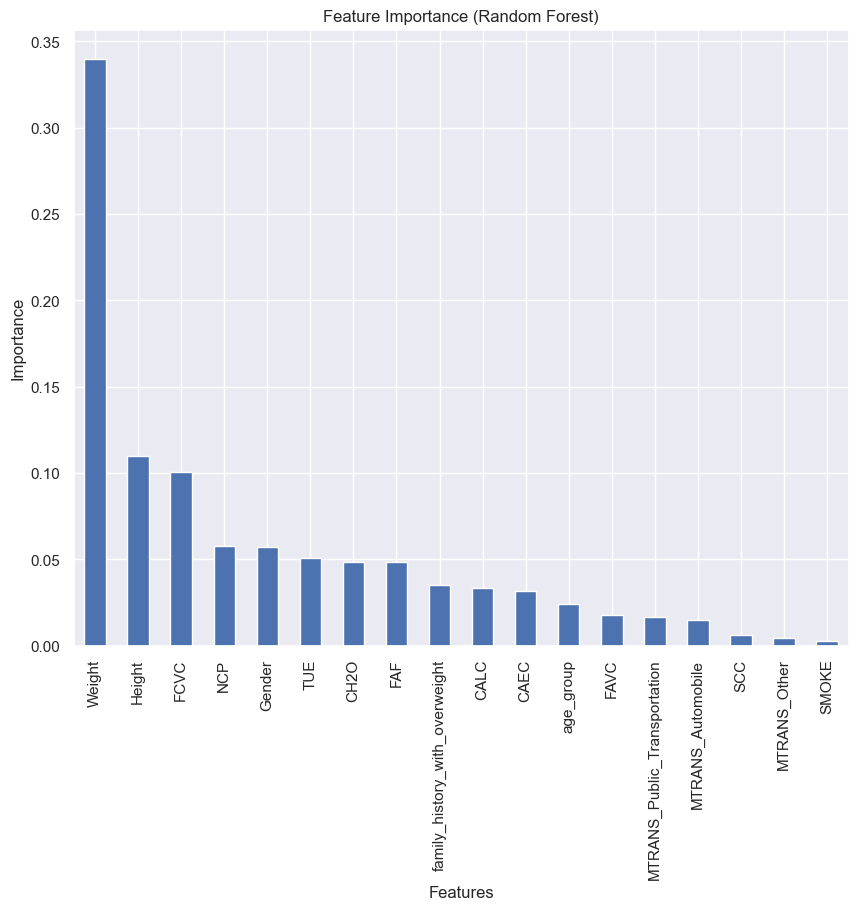

In [87]:
# Plotting feature importances
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [88]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

In [89]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_)

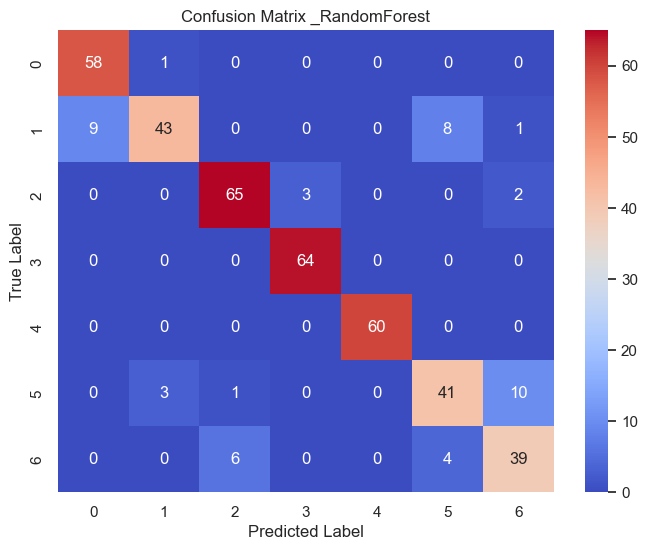

In [109]:
# Plotting the heatmap of the confusion matrix(Randomforest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix _RandomForest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [91]:
y_test

1313    2
1739    3
382     5
584     0
1711    3
       ..
1670    3
1559    3
1719    3
1676    3
344     1
Name: NObeyesdad, Length: 418, dtype: int32

In [92]:
y_train


44      1
678     0
654     0
168     6
303     0
       ..
1638    3
1095    6
1130    6
1294    2
860     5
Name: NObeyesdad, Length: 1669, dtype: int32

# MODEL EVALUATION

In [93]:
# Initialize the logistic regression model and Random forest classifier
logistic_model =LogisticRegression()
Random_model= RandomForestClassifier()

In [94]:
logistic_model

LogisticRegression()

In [95]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [96]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [97]:
# Make predictions on the test data
y_pred_log_reg = logistic_model.predict(X_test)

In [98]:
# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [99]:
# Evaluate Models

evaluate_model(y_test, y_pred_rf, "Logistic_model")

Evaluation Metrics for Logistic_model:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        59
           1       0.84      0.92      0.88        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.87      0.91        55
           6       0.92      1.00      0.96        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [100]:
Random_model

RandomForestClassifier()

In [101]:
# Fit the model on the training data
Random_model.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [103]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [104]:
# Evaluate Models

evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

Evaluation Metrics for Random Forest Classifier:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        59
           1       0.84      0.92      0.88        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.87      0.91        55
           6       0.92      1.00      0.96        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



# Feature importance(RandonForest)
To visualize which features contributed most to the model's decision making

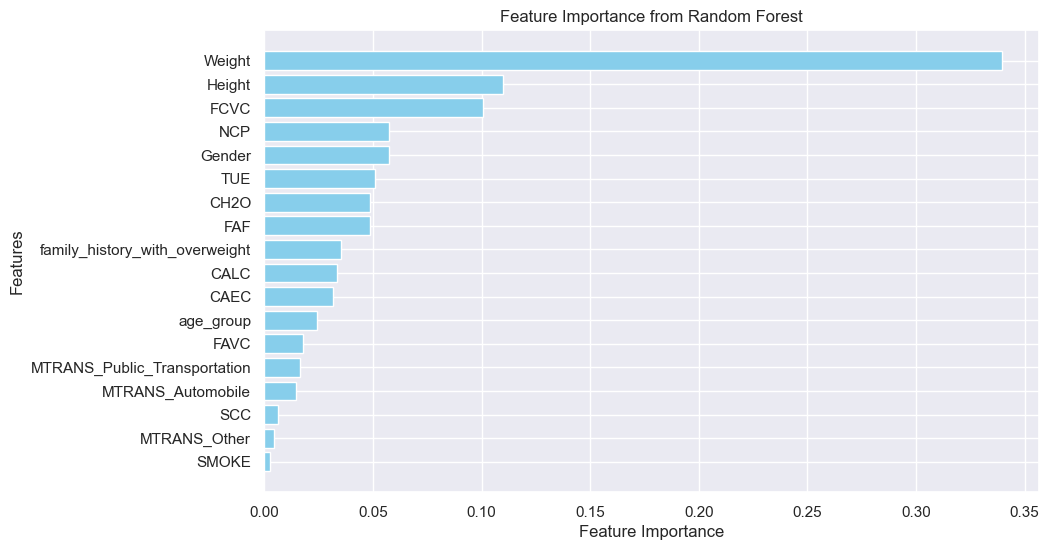

In [105]:

feature_importances = rf_clf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.show()

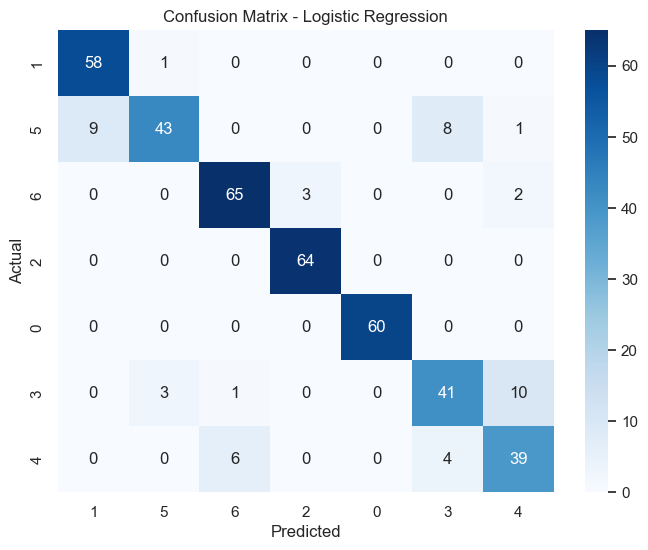

In [108]:
# Predict on the test set with Logistic Regression
y_pred_log = logistic_model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred_log)  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
